# Simulating Geometric Brownian Motion

In [16]:
import numpy as np
import matplotlib.pyplot as plt

## Geometric Brownian Motion Formula

GBM models stock prices as a stochastic process:

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

**Discrete approximation:**

$$S_{t+\Delta t} = S_t \exp\left(\left(\mu - \frac{\sigma^2}{2}\right)\Delta t + \sigma \sqrt{\Delta t} \, Z\right)$$

where $Z \sim N(0,1)$ is a standard normal random variable.

The drift term $\mu$ represents expected return, while $\sigma$ controls volatility. 

The $-\frac{\sigma^2}{2}$ term (Itô correction) ensures the expected value is correct.

In [3]:
mu = 0.1 # Drift 
n = 1000 # Number of time steps
T = 1 # Total time
M = 100 # Number of simulations
S0 = 100 # Initial stock price
sigma = 0.3 # Volatility

### Simulating Paths

In [8]:
dt = T/n # Calculate each time step
St = np.exp(
    (mu - sigma**2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size = (M,n))).T

St = np.vstack([np.ones(M),St])
St = S0 * St.cumprod(axis = 0)

In [9]:
time = np.linspace(0, T, n + 1)
tt = np.full(shape = (M, n + 1), fill_value = time).T

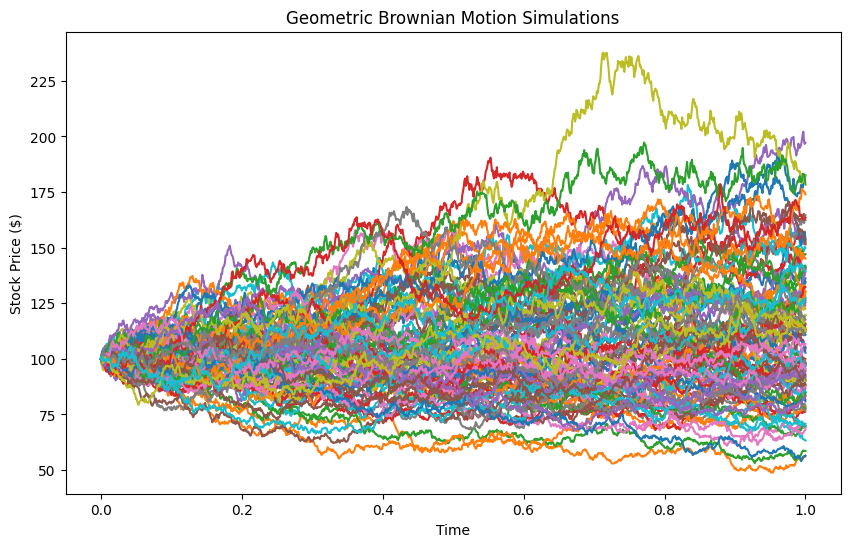

In [15]:
plt.figure(figsize=(10,6))
plt.plot(tt, St)
plt.title('Geometric Brownian Motion Simulations')
plt.xlabel('Time')
plt.ylabel('Stock Price ($)')
plt.show()